<img src='https://analyticsindiamag.com/wp-content/uploads/2022/04/Screenshot-2022-04-06-at-9.55.11-PM.png' width=750>

*Images generated by a deep neural network that interprets text to generate images (DALL·E 2)*

# PC lab: intro to Neural networks & PyTorch

Deep learning is the subfield of machine learning that concerns neural networks with representation learning capabilities. As of recent years, it is arguably the most quickly growing field within machine learning, enjoying major breakthroughs every year (Listing a couple ones from last year(s): ChatGPT, AlphaFold v2, DALL·E 2, AlphaZero). Although the popularity of neural nets is a recent phenomenon, they were first described by Warren McCulloch and Walter Pitts in 1943. Early progress in training competitive neural networks was stalled by a multitude of reasons, such as the limited computer resources, sub-optimal network architectures and the use of smaller datasets. In this PC-lab we will introduce you to the basics of implementing a neural network using contemporary practices.

## 1 Background

### From linear models to neurons to neural networks

The core unit of every (artificial) neural network is considered the neuron. Every neuron can be observed as a linear combination of **one or more inputs** $\mathbf{x}$ with weights $\mathbf{w}$ (and optionally adding a **bias** $w_0$), outputting a **single output** $a_j$ (j for the j-th neuron in a layer):


$a_j = \sum\limits_{i=1}^{D}(w_{ji}x_i) + w_0$

We can absorb the bias into the weights by adding an extra input $x_0 = 1$. This gives us:

$a_j = \sum\limits_{i=0}^{D}(w_{ji}x_i)$

To obtain the *deep learning magic*, we need to make the whole thing **non-linear**. We do this by adding **activation functions** after every (hidden) layer. The most classical activation is the sigmoid activation $\sigma()$, used also in logistic regression. Nowadays, we usually opt for a more simple activation function: the **ReLU** $\texttt{ReLU}(z) = max(0,z)$. This function has the favorable property that its derivative is very efficient to compute (1 when $z$ is positive, 0 when it is negative). It also acts as a switch: a neuron will have a "dead" ($0$) activation whenever $z$ is negative. We can write this non-linear activation as:

$z_j = h(a_j)$

Or more generally for layer $l$:

$z^{(l)} = h^{(l)}(W^{(l)}z^{(l-1)})$



For the output layer of a neural network: our activation depends on the task at hand. For binary classification, we use sigmoid to constrain our output between 0 and 1. For multi-class, we use a softmax operation so the output of all neurons sums to 1. For regression, we simply do not use an activation (or a custom one depending on your data: if you already know that your outputs can't be negative but can take all positive numbers ($\mathbb{R}^+$), then maybe a ReLU activation in the output nodes makes sense)

In order to build more intuition for neural networks: consider the following figure where we "visually build up" a neural network starting from Linear regression with four input features (**a**), to Logistic regression (**b**), to an archetypical output neuron with ReLU activation (**c**). For multi-output settings, we visualize multi-output regression (**d**), multi-label classification (more than one class can be 1 in a sample) (**e**), and multi-class classification via softmax (**f**). Finally, a simple neural network with two hidden layers for binary classification (sigmoid output head) is shown under **g**.

<img src='https://raw.githubusercontent.com/BioML-UGent/MLLS/main/11_intro_nns/lr2nn.png'>

**This figure makes it crystal clear that the most simple neural network is just a bunch of linear regressions stacked on top of eachother with non-linearities inbetween.** More advanced neural network architectures exist that modify how we make information flow between inputs. In this example, everything is just connected to everything with linear weights. This type of neural network is what we call an **MLP** or a **multi layer perceptron**.



<!-- TEX CODE TO GENERATE THE ABOVE:
\begin{table}[]
\resizebox{1.00\linewidth}{!}{
\begin{tabular}{llll}
\toprule
\textbf{Loss}    & \textbf{Formula}     & \textbf{Purpose}        & \textbf{Domain} \\[1mm] \midrule
Squared loss & $\mathcal{C}(y,~f(\mathbf{x}))~=~(y-f(\mathbf{x}))^2$ & Regression & $f(\mathbf{x}) \in \mathbb{R}$ \\[2mm]
Logistic loss & $\mathcal{C}(y,~f(\mathbf{x}))~= -y\log(f(\mathbf{x}))-(1-y)\log(1-f(\mathbf{x}))$ & Binary clf & $f(\mathbf{x}) \in [0,1]$ \\[2mm]
Cross entropy & $\mathcal{C}(\mathbf{y},~\mathbf{f}(\mathbf{x}))~= - \sum_{j=1}^k y_j\log(f_j(\mathbf{x})) $ & \begin{tabular}[c]{@{}l@{}}Multi-class\\ classification\end{tabular} & $\mathbf{f}(\mathbf{x}) \in \Delta^k$ \\[3.5mm]
Multi-label logistic loss & $\mathcal{C}(\mathbf{y},~\mathbf{f}(\mathbf{x}))~= - \sum_{j=1}^k(-y_j\log(f_j(\mathbf{x}))-(1-y_j)\log(1-f_j(\mathbf{x}))) $ & \begin{tabular}[c]{@{}l@{}}Multi-label\\ classification\end{tabular} & $\mathbf{f}(\mathbf{x}) \in [0,1]^k$ \\[3.5mm]
Multi-output squared loss & $\mathcal{C}(\mathbf{y},~\mathbf{f}(\mathbf{x}))~= - \sum_{j=1}^k(y_j-f_j(\mathbf{x}))^2 $ & \begin{tabular}[c]{@{}l@{}}Multi-output\\ regression\end{tabular} & $\mathbf{f}(\mathbf{x}) \in \mathbb{R}^k$ \\[2mm]\bottomrule
\end{tabular}
}
\end{table}
-->


Keep in mind that all of the above methods usually fit a bias/intercept in addition to weights fitted on the input features.
For an MLP, visually it would look like this:

<img src='https://raw.githubusercontent.com/BioML-UGent/MLLS/main/11_intro_nns/biases.png'>

<div class="alert alert-success">

<b>THOUGHT EXERCISE:</b>
<p> How much weights does the model pictured above have (including biases)? </p>

</div>


Written answer:
The network goes from 4->3->2->1 neurons.

The first layer has (4+1)\*3 weights.
The next (3+1)\*2.
The last (2+1)\*1.
In total: 15+8+3=26

### Dropout

Dropout is a popular addition to neural networks. It is a form of regularization during which we stochastically deactivate a percentage of neurons in every training step by putting their activation to zero. This regularization only happens during training, as during testing we (usually) want deterministic outputs. Conceptually, it is similar to other regularization techniques such as ridge regression and subsampling of features in random forest training, in the sense that it will force our model to look at all features, because sometimes one single feature will not be available during training. The difference here is that we do it by stochastically putting nodes to zero during training, and that we can perform it not only on our input features, but also on our hidden nodes.

Mathematically, it can be performed by simply sampling a boolean vector and doing element-wise multiplication.

Visually, it would look a bit like this, where nodes in cyan are dropped out, and the associated cyan weights do not have any influence on training anymore (in that training step):

<img src='https://raw.githubusercontent.com/BioML-UGent/MLLS/main/11_intro_nns/dropout.png'>

## 2 PyTorch

To implement neural networks with more ease, a few high-level python libraries are available: (PyTorch, TensorFlow/keras, JAX, ...). These libraries provide functionality in terms of automatic differentiation (backprop), ready-to-use implementations for various layers, loss functions ...

In this lab, we will use [PyTorch](https://pytorch.org). PyTorch is the most popular library for deep learning in academia as of today. For this course it offers the advantage that it has the most 'pythonic' syntax, to the point where almost all NumPy functions have a PyTorch counterpart.

If you want to run this notebook locally, you can find the installation instructions for PyTorch [here](https://pytorch.org/get-started/locally/). Make sure to select the right installation options depending on your system (if you have a GPU or not).



In [1]:
import torch
import numpy as np

### Tensors

Tensors are the fundamental data structures in PyTorch. They are analogous to NumPy arrays. The difference is that tensors can also run on GPU hardware. GPU hardware is optimized for many small computations. Matrix multiplications, the building blocks of all deep learning, run orders-of-magnitude faster on GPU than on CPU. Let's see how tensors are constructed and what we can do with them:

In [2]:
x = [[5,8],[9,8]]
print(torch.tensor(x))
print(np.array(x))

tensor([[5, 8],
        [9, 8]])
[[5 8]
 [9 8]]


In [3]:
x_numpy = np.array(x)
print(torch.from_numpy(x_numpy))

x_torch = torch.tensor(x)
print(x_torch.numpy())

tensor([[5, 8],
        [9, 8]])
[[5 8]
 [9 8]]


In [4]:
print(np.random.randn(8).shape)
print(np.random.randn(8,50).shape)


print(torch.randn(8).shape) # an alternative for .shape in PyTorch is .size()
print(torch.randn(8,50).shape)

(8,)
(8, 50)
torch.Size([8])
torch.Size([8, 50])


In [5]:
print(np.zeros((8,50)).shape)
print(torch.zeros(8,50).shape) # works with 'ones' as well

(8, 50)
torch.Size([8, 50])


In PyTorch, the standard data type for floats is `float32`, which is synonymous to `float` within its framework. `float64` is synonymous to `double`.
This is different from the NumPy defaults and naming conventions: NumPy default data type for float is `float64`. Keep this in mind when converting numpy arrays to tensors and back!

In [7]:
print(np.zeros(8).dtype)
print(torch.zeros(8).dtype)

float64
torch.float32


Conversion of data types:

In [8]:
x = torch.randn(8)
print(x.dtype)
x = x.to(torch.float64)
print(x.dtype)

torch.float32
torch.float64


`torch.long` is synonymous to `torch.int64`. The only difference between int32 and int64 is the amount of bytes with which you will store every integer. If you go up to very high numbers, you will get numerical overflow faster with more compressed data types. We recommend you to always use the defaults: `torch.long` and `torch.float`







In [9]:
x = torch.randint(low=0, high=8, size=(8,), dtype=torch.int32)
print(x)
print(x.dtype)
x = x.to(torch.long)
print(x.dtype)

tensor([5, 4, 0, 3, 1, 2, 2, 5], dtype=torch.int32)
torch.int32
torch.int64


Indexing and other operations work as in NumPy arrays

In [10]:
x = torch.randn(8,50,60)
print(x.shape)
print(x[:4,10:-10].shape)
x[0,0,:10] = 0
print(x[0,0,:16])

print(torch.min(x), torch.max(x), torch.min(torch.abs(x)))
# most of these functions are also tensor methods:
print(x.min(), x.max(), x.abs().min())

torch.Size([8, 50, 60])
torch.Size([4, 30, 60])
tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.4290,  2.0165, -0.0883,  0.3778,  0.1920, -0.1591])
tensor(-3.7854) tensor(4.0057) tensor(0.)
tensor(-3.7854) tensor(4.0057) tensor(0.)


Joining tensors via concatenation:

In [11]:
print(x.shape)
x_cat0 = torch.cat([x, x], dim=0)
print(x_cat0.shape)
x_cat1 = torch.cat([x, x, x], dim=1)
print(x_cat1.shape)

torch.Size([8, 50, 60])
torch.Size([16, 50, 60])
torch.Size([8, 150, 60])


Matrix multiplication: let's say we have an input `x`, consisting of 8 samples with 26 features, that we linearly combine with weights `w` to get a single output for every sample:



In [12]:
x = torch.randn(8,26)
w = torch.randn(26,1)

y_hat = torch.matmul(x, w) # an alternative and equivalent syntax is x @ w
print(y_hat)
print(y_hat.shape)

tensor([[ 6.7079],
        [-3.1342],
        [ 9.6673],
        [ 4.2788],
        [-1.7619],
        [-7.1649],
        [ 4.6378],
        [ 4.6133]])
torch.Size([8, 1])


Note that matrix multiplication is different from element-wise multiplication. For element-wise, `*` is used.

In [13]:
x = torch.ones(8)
print(x)
x = x - 1.5
print(x)
x -= 1.5
print(x)
x += torch.randn(1)
print(x)
x += torch.randn(8)
print(x)

tensor([1., 1., 1., 1., 1., 1., 1., 1.])
tensor([-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000])
tensor([-2., -2., -2., -2., -2., -2., -2., -2.])
tensor([-0.7898, -0.7898, -0.7898, -0.7898, -0.7898, -0.7898, -0.7898, -0.7898])
tensor([ 1.1370, -0.7820, -1.5664,  0.1012,  1.7565, -0.0019, -1.2850, -0.6443])


Broadcasting works as in NumPy: [link](https://pytorch.org/docs/stable/notes/broadcasting.html)

Keep in mind, just like in NumPy, whatever you want to do with a tensor, there's probably an elegant operation for it implemented somewhere, you just have to look for it (on google and in the documentation)

<div class="alert alert-success">

<b>EXERCISE:</b>
<p> a) Create a tensor that represents a dataset with 20 samples with 15 observed features. The first 10 features should be random values between 0 and 1, while the last 5 should be sampled from a normal distribution with mean 0 and variance 1.</p>

b) Calculate the mean and standard deviation for every feature (column) in the dataset you created in a).

c) Split the dataset in a training set (16 samples) and a test set (4 samples).
</div>

a)

In [ ]:
######## YOUR CODE HERE #########
part_1 = torch.rand(20, 10)
part_2 = torch.randn(20,5)
dataset = torch.cat([part_1, part_2], dim=1)
print(dataset.shape)
#################################

torch.Size([20, 15])


b)

In [29]:
######## YOUR CODE HERE #########
mean = dataset.mean(dim=0)
std = dataset.std(dim=0)
print("Mean:", mean)
print("Standard Deviation:", std)
#################################

Mean: tensor([ 0.4961,  0.5379,  0.5776,  0.4613,  0.5615,  0.4371,  0.4833,  0.5682,
         0.5818,  0.5333, -0.1987,  0.0258, -0.3235, -0.0997, -0.2639])
Standard Deviation: tensor([0.3033, 0.3100, 0.2615, 0.3293, 0.2807, 0.3053, 0.2548, 0.3106, 0.3388,
        0.2413, 1.5106, 0.6497, 0.9107, 0.6779, 1.0448])


c)

In [37]:
######## YOUR CODE HERE #########
train_data = dataset[:16,:]
test_data = dataset[16:,:]
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
#################################

Train data shape: torch.Size([16, 15])
Test data shape: torch.Size([4, 15])


 ## 3 Building a neural network in PyTorch

### 3.1 The building blocks

Neural networks are initialized through the use of class objects.

Many of the functionalities necessary to create [**all types of neural networks**](http://www.asimovinstitute.org/neural-network-zoo/) have [**already been implemented**](http://pytorch.org/docs/master/nn.html).

Let's inspect the most basic building blocks first: the [linear layer](https://pytorch.org/docs/master/generated/torch.nn.Linear.html#torch.nn.Linear) and the [ReLU](https://pytorch.org/docs/master/generated/torch.nn.ReLU.html#torch.nn.ReLU)

A linear layer is an object that will perform a matrix multiplication once called. Here, we instantiate such a layer with 20 input nodes and 40 output nodes:

In [42]:
import torch.nn as nn
nn.Linear(20, 40)

Linear(in_features=20, out_features=40, bias=True)

Let's simulate some random data for this layer: A data set (or batch) with 16 samples and 20 features:

In [43]:
x = torch.randn(16, 20)

Now let's use our linear layer on this data:

In [44]:
layer = nn.Linear(20, 40)
print(x.shape)
z = layer(x)
print(z.shape)

torch.Size([16, 20])
torch.Size([16, 40])


What happens when we try to feed our layer an input with a different number of features?

In [45]:
x = torch.randn(16, 30)
layer(x)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (16x30 and 20x40)

Let's see the ReLU in action:

In [46]:
relu = nn.ReLU()

x = torch.randn(2, 4)
print(x)
z = relu(x)
print(z)

tensor([[-0.1796, -0.9426, -0.2005,  0.5237],
        [ 0.2261, -0.5595,  0.7366, -0.1134]])
tensor([[0.0000, 0.0000, 0.0000, 0.5237],
        [0.2261, 0.0000, 0.7366, 0.0000]])


As you may have noticed, `nn.Module`s are class objects, a bit like scikit-learn models, that you instantiate and then call.

You can chain `nn.Module`s with the use of `nn.Sequential`:

In [48]:
linear_and_relu = nn.Sequential(nn.Linear(20, 40), nn.ReLU())

x = torch.randn(16, 20)
z = linear_and_relu(x)
z.shape

torch.Size([16, 40])

Or even longer constructs:

Always keep in mind what happens with the dimensions of your input and outputs with every layer, if your first layer outputs 40 features/nodes/hidden dimensions, then logically the next will have to take 40 as input.

In [49]:
a_whole_damn_network = nn.Sequential(
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 16),
    nn.ReLU(),
    nn.Linear(16, 4),
    nn.ReLU(),
    nn.Linear(4, 1)
    )

x = torch.randn(16, 128)
z = a_whole_damn_network(x)
print(z.shape)
print(z)

torch.Size([16, 1])
tensor([[-0.3764],
        [-0.3415],
        [-0.3490],
        [-0.3384],
        [-0.3489],
        [-0.3744],
        [-0.3308],
        [-0.3419],
        [-0.3226],
        [-0.2845],
        [-0.3377],
        [-0.3743],
        [-0.3145],
        [-0.3344],
        [-0.3347],
        [-0.3395]], grad_fn=<AddmmBackward0>)


The output $z$ that we now obtain after this whole network are called **logits**. They are the real-numbered $\mathbb{R}$ outputs that we obtain at the end of the network before our last activation function. This last activation function will be a, depending on the task at hand, sigmoid, softmax, or nothing at all for regression

Similar implementations exist for all types of layers in PyTorch (e.g. Dropout), we invite you to look them up.

### 3.2 Class object neural networks and hyperparameters

We've seen how to implement a neural network using PyTorch `nn.Sequential`. It is more flexible however to write our own model class. This allows us to have more control over which operations we use and define our own hyperparameters. To make a PyTorch model, we specify our class object to be a submodule of `nn.Module` and inherit its methods via `super().__init__()`. Further, we specify all necessary attributes (such as layers) in our `__init__` function (executed upon initialization) and implement a `forward` function which will be executed when we call the object after being initialized.

The following code shows two examples, the first one of a very basic construction of a neural network without hyperparameters. The other one shows the same network, but where we set up our `__init__` function to process hyperparameters as input arguments. We can for example specify a hyperparameter whether we want to use dropout or not. (We could go even further to have an extra hyperparameter specifying the probability of dropout, ...).

In [50]:
class BasicModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1 = nn.Linear(50, 40)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2)

        self.layer2 = nn.Linear(40, 20)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2)

        self.layer3 = nn.Linear(20, 10)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.2)

        self.layer4 = nn.Linear(10, 5)
        # Think again: why do we not want a relu and dropout after our last layer again?

    def forward(self, x):
        # call them in separate lines:
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        # or together:
        x = self.dropout2(self.relu2(self.layer2(x)))
        x = self.dropout3(self.relu3(self.layer3(x)))

        # we could've also wrapped everything in a nn.Sequential ..

        x = self.layer4(x)
        return x

class HyperparameterModel(nn.Module):
    def __init__(self, dimensions_from_input_to_output = [50, 40, 20, 10, 5], dropout = True):
        super().__init__()

        layers = []
        # iterate through all layers:
        for i in range(len(dimensions_from_input_to_output) - 2):
            layer = nn.Linear(dimensions_from_input_to_output[i], dimensions_from_input_to_output[i + 1])
            layers.append(layer)
            layers.append(nn.ReLU())
            if dropout == True:
                layers.append(nn.Dropout(0.2))


        # the last layer separate from the loop because we don't want a ReLU and dropout after the last layer
        layer = nn.Linear(dimensions_from_input_to_output[i+1], dimensions_from_input_to_output[i + 2])
        layers.append(layer)

        # wrap the layers in a sequential
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)



In [51]:
net = BasicModel()
net

BasicModel(
  (layer1): Linear(in_features=50, out_features=40, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.2, inplace=False)
  (layer2): Linear(in_features=40, out_features=20, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.2, inplace=False)
  (layer3): Linear(in_features=20, out_features=10, bias=True)
  (relu3): ReLU()
  (dropout3): Dropout(p=0.2, inplace=False)
  (layer4): Linear(in_features=10, out_features=5, bias=True)
)

In [52]:
x = torch.randn(4, 50)
y = net(x)
print(y)
print(y.shape)

tensor([[-0.1215,  0.2262, -0.1003,  0.1504, -0.1187],
        [-0.1710,  0.2473, -0.0861,  0.2136, -0.1901],
        [-0.0981,  0.1631, -0.1782,  0.2962, -0.0628],
        [-0.1715,  0.1963,  0.0128,  0.1362, -0.0359]],
       grad_fn=<AddmmBackward0>)
torch.Size([4, 5])


In [53]:
net = HyperparameterModel()
net

HyperparameterModel(
  (net): Sequential(
    (0): Linear(in_features=50, out_features=40, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=40, out_features=20, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=20, out_features=10, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=10, out_features=5, bias=True)
  )
)

In [54]:
x = torch.randn(4, 50)
y = net(x)
print(y)
print(y.shape)

tensor([[ 0.2443, -0.3752,  0.1730,  0.2714,  0.1322],
        [ 0.0539, -0.4094,  0.2934,  0.2975,  0.1947],
        [ 0.1186, -0.3998,  0.1548,  0.2609,  0.1402],
        [ 0.4508, -0.3466,  0.0595,  0.2339,  0.1056]],
       grad_fn=<AddmmBackward0>)
torch.Size([4, 5])


Or by specifying hyperparameters, the following code shows a bit of a deeper model:

In [55]:
net = HyperparameterModel(dimensions_from_input_to_output = [50, 160, 80, 40, 20, 10, 5], dropout = False)
net

HyperparameterModel(
  (net): Sequential(
    (0): Linear(in_features=50, out_features=160, bias=True)
    (1): ReLU()
    (2): Linear(in_features=160, out_features=80, bias=True)
    (3): ReLU()
    (4): Linear(in_features=80, out_features=40, bias=True)
    (5): ReLU()
    (6): Linear(in_features=40, out_features=20, bias=True)
    (7): ReLU()
    (8): Linear(in_features=20, out_features=10, bias=True)
    (9): ReLU()
    (10): Linear(in_features=10, out_features=5, bias=True)
  )
)

In [56]:
x = torch.randn(4, 50)
y = net(x)
print(y)
print(y.shape)

tensor([[-0.1207, -0.0817, -0.1389,  0.1476,  0.2005],
        [-0.1207, -0.0821, -0.1557,  0.1396,  0.2074],
        [-0.1204, -0.0792, -0.1473,  0.1379,  0.2107],
        [-0.1178, -0.0736, -0.1409,  0.1455,  0.2066]],
       grad_fn=<AddmmBackward0>)
torch.Size([4, 5])


<div class="alert alert-success">

<b>EXERCISE:</b>
<p> Now it is time to create your own model. This model should contain a "residual block". <a href="https://en.wikipedia.org/wiki/Residual_neural_network">Residual connections</a>  are a common feature where the data is allowed to skip some of the layers before being added to the output of those layers. We will worry about the reason for such connections later in the course.</p>

<img src='https://upload.wikimedia.org/wikipedia/commons/b/ba/ResBlock.png' width=400>

Create a model that takes 25 input features, has a residual block with two linear layers of each 25 nodes, before reducing to the number of classes provided as hyperparameter.
</div>

In [63]:
######## YOUR CODE HERE #########
class ResidualModel(nn.Module):
    def __init__(self, num_classes=3):
        super().__init__()
        
        # Residual block: 25 -> 25 -> 25
        self.res_layer1 = nn.Linear(25, 25)
        self.res_relu1 = nn.ReLU()
        
        # Second layer
        self.res_layer2 = nn.Linear(25, 25)
        
        # ReLU after skip connection
        self.res_relu2 = nn.ReLU()
        
        # Output layer: 25 -> num_classes
        self.output_layer = nn.Linear(25, num_classes)
    
    def forward(self, x):
        residual = x  # Save input
        
        # Residual branch
        x = self.res_layer1(x)
        x = self.res_relu1(x)
        x = self.res_layer2(x)
        
        # Add skip connection
        x = x + residual
        x = self.res_relu2(x)
        
        # Output logits
        x = self.output_layer(x)
        return x

    
#################################

In [65]:
# Test the ResidualModel
model = ResidualModel(num_classes=5)

# Create test input with 25 features
test_input = torch.randn(4, 25)
print("Input shape:", test_input.shape)

# Forward pass
output = model(test_input)
print("Output shape:", output.shape)
print("Output values:", output)


Input shape: torch.Size([4, 25])
Output shape: torch.Size([4, 5])
Output values: tensor([[ 0.3104,  1.1477, -0.1856, -0.7013, -1.3093],
        [-0.1690, -0.2086, -0.2610, -0.6671, -0.3191],
        [-0.5206,  0.0877, -0.4524, -0.3750, -0.6126],
        [ 0.5621, -0.0665, -1.0699,  0.2922, -1.3576]],
       grad_fn=<AddmmBackward0>)


### 3.3 Data

We will now take a look at how to load data in PyTorch.

In [66]:
X_train = np.random.randn(100, 784)
y_train = np.random.randint(low = 0, high = 10, size = (100))

In [67]:
X_train = torch.from_numpy(X_train)
print(X_train.dtype)

torch.float64


Remember to look at your data types: by default NumPy is `float64`, but if you instantiate a model, by default it will have weights in `float32`. It is therefore advised to convert your data to `float32`. In PyTorch, simply `float` is shorthand for `float32`.

In [68]:
X_train = X_train.float()
# Equivalent: X_train.to(torch.float) or X_train.to(torch.float32)
print(X_train.dtype)

torch.float32


In [69]:
y_train = torch.tensor(y_train)
print(y_train.dtype)

torch.int64


PyTorch has a very flexible and powerful data loading API. The core objects are the `Dataset` and the `DataLoader`. A `Dataset` is an object that represents your whole dataset, while a `DataLoader` is an object that can iterate through your dataset in batches.

Now that we have our X_train and y_train as tensors, we can make them PyTorch-ready by wrapping them in these two objects.

In [74]:
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=16, pin_memory=True, shuffle=True)

Now we can use our train_dataloader as such:

In [75]:
for batch in train_dataloader:
    X, y = batch
    print(X.shape, y.shape)

torch.Size([16, 784]) torch.Size([16])
torch.Size([16, 784]) torch.Size([16])
torch.Size([16, 784]) torch.Size([16])
torch.Size([16, 784]) torch.Size([16])
torch.Size([16, 784]) torch.Size([16])
torch.Size([16, 784]) torch.Size([16])
torch.Size([4, 784]) torch.Size([4])


As you can see, we can iterate through our batches by use of a for loop, and it will spit out a training batch consisting of a list of X and y tensors. We can also test out code by isolating one training batch like this (only necessary for testing out code):

In [77]:
batch = next(iter(train_dataloader))
batch

[tensor([[ 0.2042, -0.9117,  1.2902,  ...,  0.4294, -0.1047, -1.1318],
         [-0.4030,  0.1113, -1.5239,  ..., -0.5675, -0.6550, -0.4307],
         [ 1.0072, -0.4046, -0.2470,  ...,  0.3213,  0.1384,  0.4719],
         ...,
         [ 0.5719,  0.2928,  0.2167,  ..., -0.1196,  1.1842,  0.5789],
         [-0.3523,  1.3953, -0.8491,  ...,  0.7203, -0.4018, -0.5213],
         [ 1.6752,  1.4239,  2.4183,  ..., -0.7419, -1.0552, -1.3841]]),
 tensor([2, 0, 7, 8, 8, 3, 2, 0, 3, 0, 2, 3, 4, 6, 7, 4])]

Now we will look at the MNIST dataset, a classical dataset for image classification included in `torchvision`. 

In [78]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

X_train = train_data.data
y_train = train_data.targets

X_test = test_data.data
y_test = test_data.targets

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [79]:
print('shapes:')
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print('first training image tensor:')
print(X_train[0])
print('first five labels:')
print(y_train[:5])

shapes:
torch.Size([60000, 28, 28]) torch.Size([60000]) torch.Size([10000, 28, 28]) torch.Size([10000])
first training image tensor:
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3

Our data is images, each data sample has $28 \times 28$ input features, signifying the pixels. We have only seen models that take a 1D vector as input, therefore we need to flatten these features. Later we will see more advanced architectures that can work with 2D images directly.

In [80]:
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

In addition, the grayscale values of our images go from 0 to 255. It is perhaps good practice to min-max standardize these numbers by dividing through 255:

In [82]:
X_train = X_train / 255
X_test = X_test / 255

Finally, let's check our datatypes to see if everything is looking good to go:

In [83]:
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(torch.float32, torch.float32, torch.int64, torch.int64)

Let's split up our training set in a training and validation set and finally wrap our data in a data loader:

In [84]:
np.random.seed(42)
train_indices, val_indices = np.split(np.random.permutation(len(X_train)), [int(len(X_train)*0.8)])
X_val = X_train[val_indices]
y_val = y_train[val_indices]
X_train = X_train[train_indices]
y_train = y_train[train_indices]

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=16, pin_memory=True, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val, y_val)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=16, pin_memory=True, shuffle=True)

test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=16, pin_memory=True, shuffle=True)

Let's visualize a random batch:

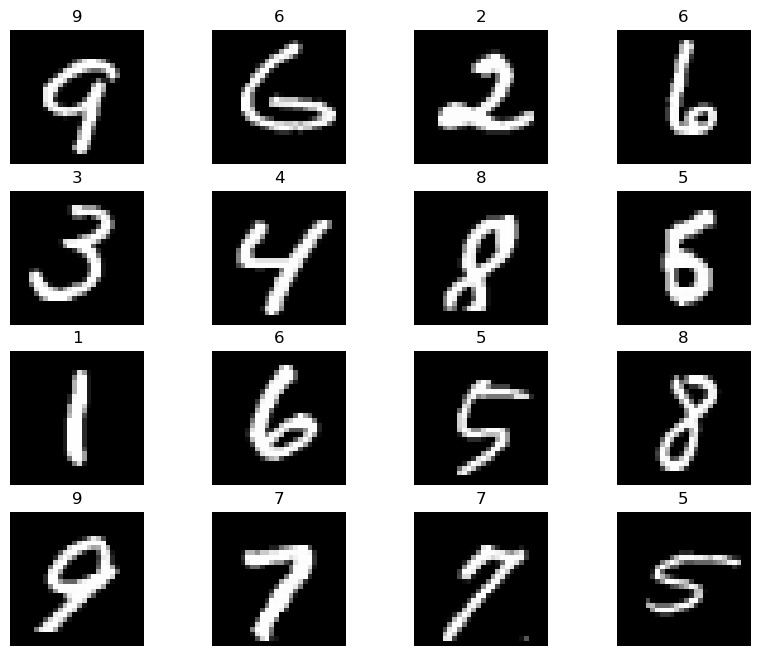

In [86]:
batch = next(iter(train_dataloader))
X_batch, y_batch = batch
import matplotlib.pyplot as plt


figure = plt.figure(figsize=(10, 8))
cols, rows = 4, 4
for i in range(cols * rows):
    img, label = X_batch[i], y_batch[i]
    figure.add_subplot(rows, cols, i+1)
    plt.title(label.item())
    plt.axis("off")
    plt.imshow(img.reshape(-1, 28, 28).squeeze(), cmap="gray")
plt.show()

<div class="alert alert-success">

<b>EXERCISE:</b>
<p>Let us now put all of this together. 

a) Create a model that classifies MNIST digits. Make sure it has to right number of inputs and outputs. The rest is up to you!

b) Create the dataloader and use a batch size of 32. Loop through the training data in batches, and for every batch do a forward pass through your model. (Limit yourself to a fixed number of batches so you don't go through the whole dataset for this exercise.) Next PC lab we will see how to do backpropagation and optimize our model, for now just do the forward pass and print the output shape to see if everything is working as expected.</p>

</div>

In [94]:
######## YOUR CODE HERE #########
# a) Create a model that classifies MNIST digits
model = HyperparameterModel(dimensions_from_input_to_output=[784, 128, 10])

# b) Create the training dataLoader and loop through training data in batches (limited to 20 batches)
exercise_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, pin_memory=True, shuffle=True)

for i, batch in enumerate(exercise_dataloader):
    if i >= 20:  # Limit to 20 batches
        break
    
    X_batch, y_batch = batch
    y_hat_batch = model(X_batch)
    print(f"Batch {i+1}: Output shape: {y_hat_batch.shape}")
#################################


Batch 1: Output shape: torch.Size([32, 10])
Batch 2: Output shape: torch.Size([32, 10])
Batch 3: Output shape: torch.Size([32, 10])
Batch 4: Output shape: torch.Size([32, 10])
Batch 5: Output shape: torch.Size([32, 10])
Batch 6: Output shape: torch.Size([32, 10])
Batch 7: Output shape: torch.Size([32, 10])
Batch 8: Output shape: torch.Size([32, 10])
Batch 9: Output shape: torch.Size([32, 10])
Batch 10: Output shape: torch.Size([32, 10])
Batch 11: Output shape: torch.Size([32, 10])
Batch 12: Output shape: torch.Size([32, 10])
Batch 13: Output shape: torch.Size([32, 10])
Batch 14: Output shape: torch.Size([32, 10])
Batch 15: Output shape: torch.Size([32, 10])
Batch 16: Output shape: torch.Size([32, 10])
Batch 17: Output shape: torch.Size([32, 10])
Batch 18: Output shape: torch.Size([32, 10])
Batch 19: Output shape: torch.Size([32, 10])
Batch 20: Output shape: torch.Size([32, 10])
